In [1]:
%env CUDA_VISIBLE_DEVICES=3
%load_ext autoreload
%autoreload 2

env: CUDA_VISIBLE_DEVICES=3


In [2]:
%matplotlib inline

In [3]:
from inf.pimlp import *
from meta.train import parse_main
from tests.test_pimlp import *
from tqdm.notebook import tqdm
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
sns.set()
def tight_layout(plt):
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

In [4]:
torch.__version__

'1.5.1'

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def getarglst(**kw):
  arglst = ('dataset --dataset omniglot --num-ways 5 --num-shots 1 --use-cuda --step-size 0.5 '
            '--num-workers 8 --num-epochs 1 --output-folder results --num-shots-test 2 --normalize None '
            '--scheduler multistep --Gproj-inner --Gproj-outer '
           )
  arglst += ' '.join(['--' + k.replace('_', '-') + ' ' + str(v)
                      for k, v in kw.items() if not isinstance(v, bool)])
  arglst += ' ' + ' '.join(['--' + k.replace('_', '-') for k, v in kw.items() if v is True])
  arglst = arglst.split(' ')
  return arglst

In [6]:
kws = dict(
  num_batches=[100],
  batch_size=[1],
  meta_lr=[0.2, 0.5, 1],
  meta_momentum=[0, 0.5],
  grad_clip=[0],
#   hidden_size=[1000, -1],
  bias_alpha=[0.5],
  infnet_r=[1],
  first_layer_alpha=[0.5],
  depth=[2],
  readout_zero_init=[True],
  no_adapt_readout=[False],
  first_order=[False],
  adapt_readout_only=[True],
  first_layer_lr_mult=[0]
)

In [209]:
kws = dict(
  num_batches=[100],
  batch_size=[1],
  meta_lr=[20],
  meta_momentum=[0],
  grad_clip=[0.01],
#   hidden_size=[1000, -1],
  bias_alpha=[4],
#   last_bias_alpha=[1],
  infnet_r=[100],
  first_layer_alpha=[1],
  depth=[2],
  readout_zero_init=[True],
  no_adapt_readout=[False],
  first_order=[False],
  adapt_readout_only=[True],
  first_layer_lr_mult=[4],
  last_layer_lr_mult=[1],
)

In [47]:
kws = dict(
  num_batches=[100],
  batch_size=[1],
  meta_lr=[10],
  meta_momentum=[0],
  grad_clip=[0.1],
#   hidden_size=[1000, -1],
  bias_alpha=[4],
#   last_bias_alpha=[1],
  infnet_r=[100],
  first_layer_alpha=[2],
  depth=[1],
  readout_zero_init=[True],
  no_adapt_readout=[False],
  first_order=[False],
  adapt_readout_only=[True],
  first_layer_lr_mult=[0.2],
  last_layer_lr_mult=[0, 1],
)

num_batches=100, batch_size=1, meta_lr=20, meta_momentum=0, grad_clip=0.1, bias_alpha=4, infnet_r=100, first_layer_alpha=2, depth=1, readout_zero_init=True, no_adapt_readout=False, first_order=False, adapt_readout_only=True, first_layer_lr_mult=0.2, last_layer_lr_mult=0.001
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/7c07206c2ed6029bc2f0dc7234912725555b0e27
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/5f0c88ae08d34641f42887bc08ef654bd6ca0031
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/5721b05c4095f4c44b4282cbf5131e93d75dd5c9
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/274053d9f3fa10ee073e69b92a77514357172099


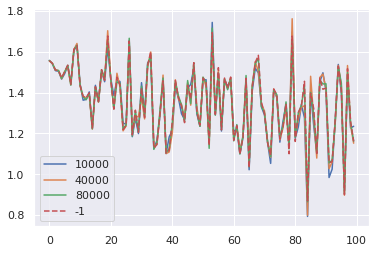

In [32]:
losses = {}
for combo in product(*kws.values()):
  combo = dict(zip(kws.keys(), combo))
  title = ', '.join(f'{k}={v}' for k, v in combo.items())
  print(title)
  for width in [10000, 40000, 80000, -1]:
    combo['hidden_size'] = width
    out = parse_main(getarglst(**combo), True, False, True)
    if combo['hidden_size'] < 0:
      fmt = '--'
    else:
      fmt = '-'
    plt.plot(out['all_outer_losses'], fmt, label=combo['hidden_size'])
#   plt.title(title)
  plt.legend() 
  plt.show()

num_batches=100, batch_size=1, meta_lr=10, meta_momentum=0, grad_clip=0.1, bias_alpha=4, infnet_r=100, first_layer_alpha=2, depth=1, readout_zero_init=True, no_adapt_readout=False, first_order=False, adapt_readout_only=True, first_layer_lr_mult=0.2, last_layer_lr_mult=0
readout will be fixed at zero before adaptation
readout will be fixed at zero before adaptation
readout will be fixed at zero before adaptation
readout will be fixed at zero before adaptation


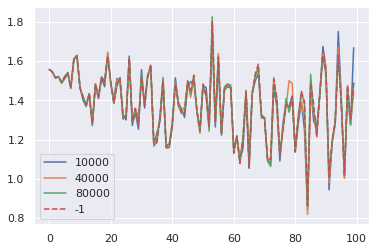

num_batches=100, batch_size=1, meta_lr=10, meta_momentum=0, grad_clip=0.1, bias_alpha=4, infnet_r=100, first_layer_alpha=2, depth=1, readout_zero_init=True, no_adapt_readout=False, first_order=False, adapt_readout_only=True, first_layer_lr_mult=0.2, last_layer_lr_mult=1
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/87e10d0d975c102b52c242c8715c4418cb52440c
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/a2a03ba8f918d38e687e58d45e9c48786fc45845
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/4cf9189d71b0f3aa38c85a6eff214f3f547e3521
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/9f12672147ae71cfadd70cc79a6fd7bd2618c62e


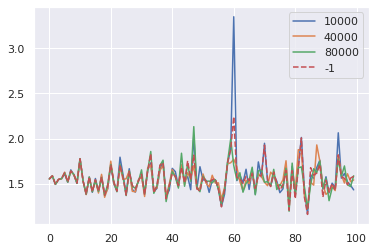

In [48]:
losses = {}
for combo in product(*kws.values()):
  combo = dict(zip(kws.keys(), combo))
  title = ', '.join(f'{k}={v}' for k, v in combo.items())
  print(title)
  for width in [10000, 40000, 80000, -1]:
    combo['hidden_size'] = width
    out = parse_main(getarglst(**combo), True, False, True)
    if combo['hidden_size'] < 0:
      fmt = '--'
    else:
      fmt = '-'
    plt.plot(out['all_outer_losses'], fmt, label=combo['hidden_size'])
#   plt.title(title)
  plt.legend() 
  plt.show()

In [207]:
import pdb; pdb.pm()

> /home/gregyang/myprojects/projects1/PiNet/inf/pimlp.py(53)__init__()
     51       last_bias_alpha = bias_alpha
     52     elif last_bias_alpha != bias_alpha:
---> 53       raise NotImplementedError("this branch is a bit stale; check that it's implemented for finnet/maml/cifar10")
     54     self.last_bias_alpha = last_bias_alpha
     55     # _linears is used purely to register modules

ipdb> last_bias_alpha
0
ipdb> exit


num_batches=40, batch_size=1, meta_lr=0.05, meta_momentum=0, grad_clip=0, bias_alpha=0, infnet_r=100, first_layer_alpha=4, depth=1, readout_zero_init=True, no_adapt_readout=False, first_order=True, adapt_readout_only=False, first_layer_lr_mult=0
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/87cd8c23fe9ad2a3b780d995168d2ca72115a325
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/c2b1605094b785fa8707e1d47b4765ac33c9d06f
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/8ff1ed9079a262f96badbb425431d7ade1180d5e
Logging in: /home/gregyang/myprojects/projects1/PiNet/results/264094beedca99ed4964b9e2be924b66721af465


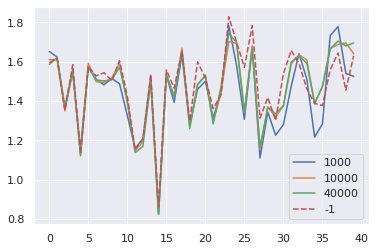

In [51]:
losses = {}
for combo in product(*kws.values()):
  combo = dict(zip(kws.keys(), combo))
  title = ', '.join(f'{k}={v}' for k, v in combo.items())
  print(title)
  for width in [1000, 10000, 40000, -1]:
    combo['hidden_size'] = width
    out = parse_main(getarglst(**combo), True, False, True)
    if combo['hidden_size'] < 0:
      fmt = '--'
    else:
      fmt = '-'
    plt.plot(out['all_outer_losses'], fmt, label=combo['hidden_size'])
#   plt.title(title)
  plt.legend() 
  plt.show()